In [11]:
using CPTVCA
using ExactDiagonalization
using QuantumLattices
using Distributed
using Plots

In [12]:
unitcell = Lattice([0, 0]; vectors=[[1, 0],[0, 1]])
cluster = Lattice(unitcell,(2,2),('p','p'))
hilbert = Hilbert(site=>Fock{:f}(3, 2) for site=1:length(cluster))

t1 = Hopping(:t1,0.617,1,Coupling(Index(:, FID(1, :, :)), Index(:, FID(1, :, :))))
t2 = Hopping(:t2,0.685,1,Coupling(Index(:, FID(2, :, :)), Index(:, FID(2, :, :))))
t3 = Hopping(:t3,0.686,1,Coupling(Index(:, FID(3, :, :)), Index(:, FID(3, :, :))))
m1 = Onsite(:m1, 1.2, Coupling(Index(:, FID(1, :, :)), Index(:, FID(1, :, :))))
m2 = Onsite(:m2, 1.3, Coupling(Index(:, FID(2, :, :)), Index(:, FID(2, :, :))))
m3 = Onsite(:m3, 2.24, Coupling(Index(:, FID(3, :, :)), Index(:, FID(3, :, :))))



Term{:Onsite, :m3, Float64, Int64, QuantumLattices.DegreesOfFreedom.TermCoupling{Coupling{Int64, Tuple{Index{Colon, FID{:*, Int64, Colon, Colon}}, Index{Colon, FID{:*, Int64, Colon, Colon}}}, Constraint{(2,), 1, Tuple{QuantumLattices.DegreesOfFreedom.Diagonal{(:spin,)}}}}, Coupling{Int64, Tuple{Index{Colon, FID{:*, Int64, Colon, Colon}}, Index{Colon, FID{:*, Int64, Colon, Colon}}}, Constraint{(2,), 1, Tuple{QuantumLattices.DegreesOfFreedom.Diagonal{(:spin,)}}}}}, QuantumLattices.DegreesOfFreedom.TermAmplitude{Nothing}, QuantumLattices.DegreesOfFreedom.TermModulate{Val{true}, :m3}}(2.24, 0, QuantumLattices.DegreesOfFreedom.TermCoupling{Coupling{Int64, Tuple{Index{Colon, FID{:*, Int64, Colon, Colon}}, Index{Colon, FID{:*, Int64, Colon, Colon}}}, Constraint{(2,), 1, Tuple{QuantumLattices.DegreesOfFreedom.Diagonal{(:spin,)}}}}, Coupling{Int64, Tuple{Index{Colon, FID{:*, Int64, Colon, Colon}}, Index{Colon, FID{:*, Int64, Colon, Colon}}}, Constraint{(2,), 1, Tuple{QuantumLattices.DegreesOfFr

In [13]:
function ExHubbard(id::Symbol, value, coupling = Coupling(:, FID, :, (1//2, 1//2, -1//2, -1//2), (2, 1, 2, 1)); amplitude::Union{Function, Nothing}=nothing, modulate::Union{Function, Bool}=true)
    return Term{:ExHubbard}(id, value, 0, coupling, true; amplitude=amplitude, modulate=modulate)
end
U11 = ExHubbard(:U11, 2.20, Coupling(Index(:, FID(1, 1//2, 2)),Index(:, FID(1, 1//2, 1)),Index(:, FID(1, -1//2, 2)),Index(:, FID(1, -1//2, 1))))
U22 = ExHubbard(:U22, 1.58, Coupling(Index(:, FID(2, 1//2, 2)),Index(:, FID(2, 1//2, 1)),Index(:, FID(2, -1//2, 2)),Index(:, FID(2, -1//2, 1))))
U33 = ExHubbard(:U33, 1.61, Coupling(Index(:, FID(3, 1//2, 2)),Index(:, FID(3, 1//2, 1)),Index(:, FID(3, -1//2, 2)),Index(:, FID(3, -1//2, 1))))
U12 = ExHubbard(:U12, 1.86, Coupling(Index(:, FID(1, 1//2, 2)),Index(:, FID(1, 1//2, 1)),Index(:, FID(2, -1//2, 2)),Index(:, FID(2, -1//2, 1))))
U13 = ExHubbard(:U13, 1.90, Coupling(Index(:, FID(1, 1//2, 2)),Index(:, FID(1, 1//2, 1)),Index(:, FID(3, -1//2, 2)),Index(:, FID(3, -1//2, 1))))
U23 = ExHubbard(:U23, 1.59, Coupling(Index(:, FID(2, 1//2, 2)),Index(:, FID(2, 1//2, 1)),Index(:, FID(3, -1//2, 2)),Index(:, FID(3, -1//2, 1))))
U21 = ExHubbard(:U21, 1.86, Coupling(Index(:, FID(2, 1//2, 2)),Index(:, FID(2, 1//2, 1)),Index(:, FID(1, -1//2, 2)),Index(:, FID(1, -1//2, 1))))
U31 = ExHubbard(:U31, 1.90, Coupling(Index(:, FID(3, 1//2, 2)),Index(:, FID(3, 1//2, 1)),Index(:, FID(1, -1//2, 2)),Index(:, FID(1, -1//2, 1))))
U32 = ExHubbard(:U32, 1.59, Coupling(Index(:, FID(3, 1//2, 2)),Index(:, FID(3, 1//2, 1)),Index(:, FID(2, -1//2, 2)),Index(:, FID(2, -1//2, 1))))


Term{:ExHubbard, :U32, Float64, Int64, QuantumLattices.DegreesOfFreedom.TermCoupling{Coupling{Int64, NTuple{4, Index{Colon, FID{:*, Int64, Rational{Int64}, Int64}}}, Constraint{(4,), 1, Tuple{QuantumLattices.DegreesOfFreedom.Diagonal{()}}}}, Coupling{Int64, NTuple{4, Index{Colon, FID{:*, Int64, Rational{Int64}, Int64}}}, Constraint{(4,), 1, Tuple{QuantumLattices.DegreesOfFreedom.Diagonal{()}}}}}, QuantumLattices.DegreesOfFreedom.TermAmplitude{Nothing}, QuantumLattices.DegreesOfFreedom.TermModulate{Val{true}, :U32}}(1.59, 0, QuantumLattices.DegreesOfFreedom.TermCoupling{Coupling{Int64, NTuple{4, Index{Colon, FID{:*, Int64, Rational{Int64}, Int64}}}, Constraint{(4,), 1, Tuple{QuantumLattices.DegreesOfFreedom.Diagonal{()}}}}, Coupling{Int64, NTuple{4, Index{Colon, FID{:*, Int64, Rational{Int64}, Int64}}}, Constraint{(4,), 1, Tuple{QuantumLattices.DegreesOfFreedom.Diagonal{()}}}}}(Index(:, FID(3, 1//2, 2)) Index(:, FID(3, 1//2, 1)) Index(:, FID(2, -1//2, 2)) Index(:, FID(2, -1//2, 1))), Qu

In [14]:
terms = (t1,t2,t3,m1,m2,m3,U11,U22,U33,U12,U13,U23,U21,U31,U32)
#terms = (t1,t2,t3,U11,U22,U33,U12,U13,U23,U21,U31,U32)
neighbors = Neighbors(0=>0.0, 1=>1.0)
k = EDKind{:FED}()
table = Table(hilbert, Metric(k, hilbert))
origibonds = bonds(cluster, neighbors)
referbonds = filter(bond -> isintracell(bond), origibonds)
origigenerator = OperatorGenerator(terms, origibonds, hilbert; table = table)
refergenerator = OperatorGenerator(terms, referbonds, hilbert; table = table)
rops = expand(refergenerator)

Operators with 108 Operator
  Operator(2.24, CompositeIndex(Index(1, FID{:f}(3, -1//2, 2)), [0.0, 0.0], [0.0, 0.0]), CompositeIndex(Index(1, FID{:f}(3, -1//2, 1)), [0.0, 0.0], [0.0, 0.0]))
  Operator(0.685, CompositeIndex(Index(3, FID{:f}(2, 1//2, 2)), [0.0, 1.0], [0.0, 0.0]), CompositeIndex(Index(4, FID{:f}(2, 1//2, 1)), [1.0, 1.0], [0.0, 0.0]))
  Operator(2.24, CompositeIndex(Index(4, FID{:f}(3, -1//2, 2)), [1.0, 1.0], [0.0, 0.0]), CompositeIndex(Index(4, FID{:f}(3, -1//2, 1)), [1.0, 1.0], [0.0, 0.0]))
  Operator(0.686, CompositeIndex(Index(2, FID{:f}(3, 1//2, 2)), [1.0, 0.0], [0.0, 0.0]), CompositeIndex(Index(4, FID{:f}(3, 1//2, 1)), [1.0, 1.0], [0.0, 0.0]))
  Operator(1.9, CompositeIndex(Index(3, FID{:f}(3, 1//2, 2)), [0.0, 1.0], [0.0, 0.0]), CompositeIndex(Index(3, FID{:f}(3, 1//2, 1)), [0.0, 1.0], [0.0, 0.0]), CompositeIndex(Index(3, FID{:f}(1, -1//2, 2)), [0.0, 1.0], [0.0, 0.0]), CompositeIndex(Index(3, FID{:f}(1, -1//2, 1)), [0.0, 1.0], [0.0, 0.0]))
  Operator(0.686, CompositeI

In [15]:
cons = Conservation(12,1//2;np=8,sz=0)


Conservation{Int64, Rational{Int64}, Int64, Int64}(12, 1//2, 8, 0)

In [16]:
edsolver = EDSolver(k, refergenerator, cons, table; m = 200)
perioder = Perioder(unitcell, cluster, table)

Perioder{Vector{Int64}, Matrix{Vector{Int64}}, Vector{Vector{Int64}}, Vector{Tuple{Vector{Int64}, Vector{Int64}}}}([[1, 4, 7, 10] [2, 5, 8, 11] [3, 6, 9, 12]; [13, 16, 19, 22] [14, 17, 20, 23] [15, 18, 21, 24]], [[1, 2, 3, 4]], [([1, 1], [1, 1]), ([1, 1], [1, 2]), ([1, 1], [1, 3]), ([1, 1], [2, 1]), ([1, 1], [2, 2]), ([1, 1], [2, 3]), ([1, 2], [1, 1]), ([1, 2], [1, 2]), ([1, 2], [1, 3]), ([1, 2], [2, 1])  …  ([2, 2], [1, 3]), ([2, 2], [2, 1]), ([2, 2], [2, 2]), ([2, 2], [2, 3]), ([2, 3], [1, 1]), ([2, 3], [1, 2]), ([2, 3], [1, 3]), ([2, 3], [2, 1]), ([2, 3], [2, 2]), ([2, 3], [2, 3])])

 11.321789 seconds (130.24 M allocations: 18.923 GiB, 11.12% gc time)


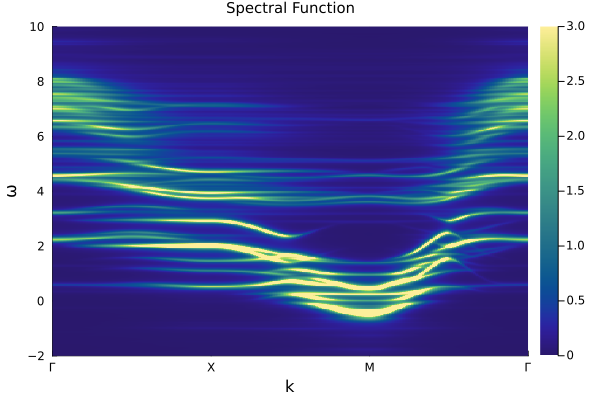

In [18]:
#edsolver = loadData("RuO4_solver.jls")
vca = VCA(unitcell, cluster, origigenerator, refergenerator,edsolver,perioder)
k_path = ReciprocalPath(reciprocals(unitcell.vectors), rectangle"Γ-X-M-Γ", length=100)
ω_range = range(-2, 10, length=400)
fq = ω_range .+ (0.05*im)
@time G = singleParticleGreenFunction(vca, k_path, fq)
A = spectrum(G)
colorbar = cgrad(:haline)
f = plot(k_path, ω_range, A; xlabel="k", ylabel="ω", color=colorbar, title="Spectral Function",clims=(0, 3))